Imports

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

Initializations

In [2]:
mnist = input_data.read_data_sets('../MNIST_data', one_hot=True)

input_dim = 28 * 28 # number of pixels in one picture
h1_dim = 128 # size of hidden layer
output_dim = 10 # number of classes (10 digits)

learning_rate = 0.01
epoch_range = 5000
batch_size = 50

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz


Xavier initialization for weights

In [3]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

Network initialization

In [4]:
x = tf.placeholder("float32", shape=[None, input_dim])
y = tf.placeholder("float32", shape=[None, output_dim])

N_W1 = tf.Variable(xavier_init([input_dim, h1_dim]))
N_B1 = tf.Variable(np.zeros(shape=[h1_dim]))
N_B1 = tf.cast(N_B1, "float32")

N_W2 = tf.Variable(xavier_init([h1_dim, output_dim]))
N_B2 = tf.Variable(np.zeros(shape=output_dim))
N_B2 = tf.cast(N_B2, "float32")

hidden_layer = tf.nn.sigmoid(tf.matmul(x, N_W1) + N_B1)
output_layer = tf.matmul(hidden_layer, N_W2) + N_B2

Optimizer and loss function

In [5]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output_layer, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

Correct prediction model and accuracy measurements

In [6]:
prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
prediction = tf.cast(prediction, "float32")
accuracy = tf.reduce_mean(prediction)

Training cycle with accuracy output

In [7]:
sess = tf.InteractiveSession()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(epoch_range):
    batch_x, batch_y = mnist.train.next_batch(batch_size=batch_size)
    if epoch % 100 == 0:
        training = accuracy.eval({x: batch_x, y:batch_y})
        validation = accuracy.eval({x: mnist.validation.images, y:mnist.validation.labels})
        print("Training accuracy " + str(training))
        print("Validation accuracy " + str(validation))

    sess.run([optimizer, loss], feed_dict={x:batch_x, y:batch_y})

Training accuracy 0.1
Validation accuracy 0.099
Training accuracy 0.84
Validation accuracy 0.869
Training accuracy 0.9
Validation accuracy 0.9006
Training accuracy 0.9
Validation accuracy 0.9286
Training accuracy 0.96
Validation accuracy 0.9422
Training accuracy 0.9
Validation accuracy 0.9374
Training accuracy 0.98
Validation accuracy 0.9502
Training accuracy 0.96
Validation accuracy 0.9502
Training accuracy 0.94
Validation accuracy 0.9502
Training accuracy 0.98
Validation accuracy 0.9402
Training accuracy 0.96
Validation accuracy 0.958
Training accuracy 0.94
Validation accuracy 0.9488
Training accuracy 0.96
Validation accuracy 0.9628
Training accuracy 1.0
Validation accuracy 0.9606
Training accuracy 0.94
Validation accuracy 0.967
Training accuracy 0.98
Validation accuracy 0.964
Training accuracy 0.94
Validation accuracy 0.9622
Training accuracy 0.96
Validation accuracy 0.9626
Training accuracy 0.96
Validation accuracy 0.969
Training accuracy 0.96
Validation accuracy 0.9644
Training ac

Try to predict a number

[1]


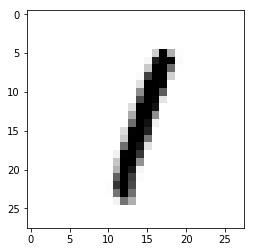

In [8]:
test_number = mnist.test.images[5]
plt.imshow(test_number.reshape(28,28), cmap="Greys");
predict = tf.argmax(output_layer, 1)
print(predict.eval({x:test_number.reshape(1,28*28)}))